## Notebook for calculating Mask Consistency Score for GAN-transformed images

In [3]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import glob, os
import numpy as np
import matplotlib.image as mpimg
#from keras.preprocessing.image import img_to_array, array_to_img

## 1. Resize GAN-transformed Dataset to 1024*1024

#### 1.1 Specify Args: Directory, folder name and the new image size

In [143]:
folder = 'A2B_FID'
image_size = 1024
dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain14_Blattfeder/Results/training4_batch4_400trainA_250trainB/samples_testing'

#### 1.2 Create new Folder "/A2B_FID_1024" in Directory

In [144]:
old_folder = (os.path.join(dir, folder))
new_folder = (os.path.join(dir, folder+'_'+str(image_size)))

if not os.path.exists(new_folder):
    try:
        os.mkdir(new_folder)
    except FileExistsError:
        print('Folder already exists')
        pass

In [5]:
print(os.path.join(old_folder))
print(os.path.join(dir, folder+'_'+str(image_size)))

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain14_Blattfeder/Results/training4_batch4_400trainA_250trainB/samples_testing/A2B_FID
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain14_Blattfeder/Results/training4_batch4_400trainA_250trainB/samples_testing/A2B_FID_1024


#### 1.3 Function for upsampling images of 256-256 or 512-512 to images with size 1024-1024

In [6]:
new_size = image_size
width = new_size
height = new_size
dim = (width, height)
#images = glob.glob(os.path.join(new_folder, '*.jpg')) + glob.glob(os.path.join(new_folder, '*.png'))

def resize_upsampling(old_folder, new_folder):
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        # INTER_CUBIC or INTER_LANCZOS4
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)
        
def resize_downsampling(old_folder, new_folder):
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)

#### 1.4 Run the aforementoined function

In [7]:
resize_upsampling(old_folder, new_folder)

Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1

Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1024, 3)
Shape: (256, 256, 3) is now resized to: (1024, 1

## 2. Use the annotation Tool Labelme to create polygons in JSON format

We than use the JSON files with polygon data to create semantic segmentation mask - no instance segmentation needed, because we do not need to differenciate between distinct features. We use the bash and python skript in this directory to do the mask translation.

In [8]:
!ls
!pwd

'$'				     imlib	        __pycache__
 augmentation.py		     interpolation.py   pylib
 data.py			     labelme2coco.py    README.md
 datasets			     labelme2voc.py     resize_images_pascalvoc
 download_dataset.sh		     labels.txt         test.py
 FeatureConsistencyScore_1.1.ipynb   LICENSE	        tf2gan
'FeatureConsistency Score.ipynb'     mask-score.ipynb   tf2lib
 FeatureScore			     module.py	        train.py
 fid.py				     output
/home/molu1019/workspace/CycleGAN-Tensorflow-2


Insert the folder path as **input_dir** where the GAN transformed images with corresponding JSON label are located.

In [4]:
input_dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1'
output_dir = input_dir+'_mask'
print(output_dir)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1_mask


In [24]:
!python3 labelme2voc.py $input_dir $output_dir --labels labels.txt

Creating dataset: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1_mask
class_names: ('_background_', 'Blattfeder', 'Blattfeder_nio', 'Wandlerhalter', 'Getriebeflansch_Mutter', 'Getriebeflansch_Abdeckung', 'Entluefter')
Saved class_names: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1_mask/class_names.txt
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1/rgb_274321.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1/rgb_274414.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1/rgb_273810.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1/rgb_274350.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data

In [5]:
seg_dir = output_dir+'/SegmentationObjectPNG'
print(seg_dir)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/Batch1_mask/SegmentationObjectPNG


In [6]:
GAN_mask_images = os.listdir(seg_dir)
print(GAN_mask_images)

['rgb_274321.png', 'rgb_274414.png', 'rgb_273810.png', 'rgb_274350.png', 'rgb_274227.png', 'rgb_274288.png', 'rgb_273684.png', 'rgb_273905.png', 'rgb_273715.png', 'rgb_274513.png', 'rgb_274544.png', 'rgb_274002.png', 'rgb_273747.png', 'rgb_273971.png', 'rgb_273462.png', 'rgb_273582.png', 'rgb_273366.png', 'rgb_274064.png', 'rgb_274032.png', 'rgb_273430.png']


## 3. Prepare Syntetic Image Masks

In [7]:
mask_Blattfeder = [149, 255, 0]
mask_Entluefter = []
mask_Wandlerhalter = []
mask_Getreibeflansch = []
mask_Abdeckung = []

#### Resize syn. Masks from 1920-1080 to 1024-1024 

In [47]:
def resize_(image, size):
    """Read a ndarry of images and resizes them as a square according to the given size
    Args: 
        image: a ndarray 
        size: required new squared format
    """
    dim = (size, size)
    img = cv2.imread(image)
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # tp show as array use display()
    #display(img_resized)
    #plt.imshow(img_resized)
    cv2.imwrite(image, img_resized)
    return img_resized

#### Operation for reading png segmentation masks from folder path, resize, convert to greyscale and save images in 'data' array

In [48]:
def gan_op(path, size=1024, resize=None):
    """Read and resize images as ndarray.
    Args:
        path: A string, path of images.
        size: A tuple of 2 integers,
            (heights, widths).
        resize: A float or None,
            specifying how the image value should be resized.
            If None, no scaled.
    """
    
    if resize:
        for file in glob.glob(os.path.join(path, '*.png')):
            img = resize_(file, size)
    
    img_list = [f for f in os.listdir(path) if not f.startswith(".")]
    data = np.empty((len(img_list), size, size))
    
    for i, _path in enumerate(img_list):
        img = Image.open(path + os.sep + _path).convert('L')
        img = np.array(img)
        data[i] = img
    
    return data

### Syntetical Image Data

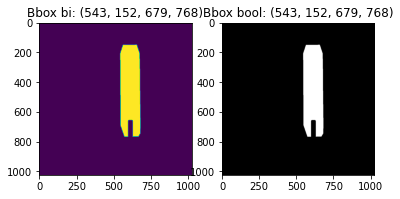

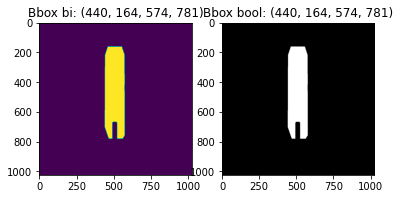

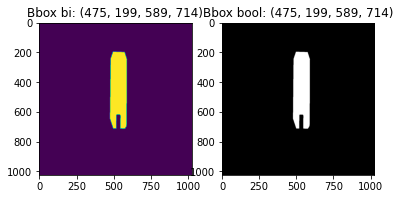

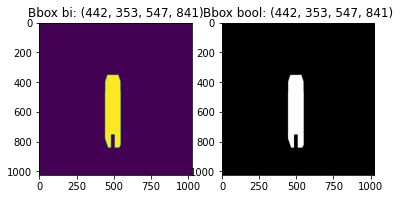

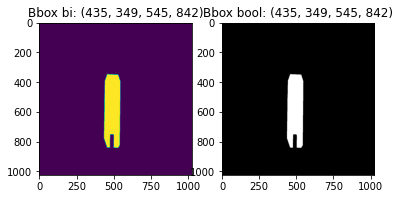

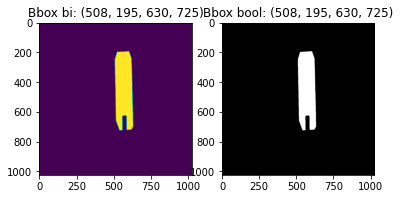

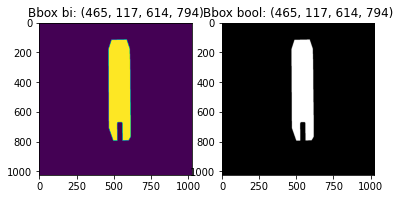

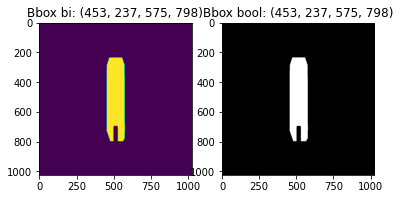

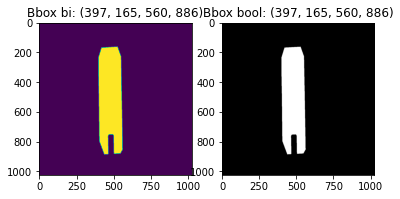

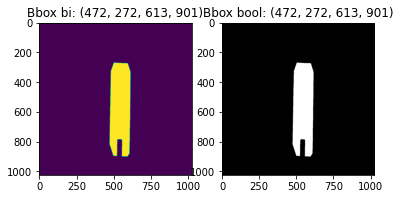

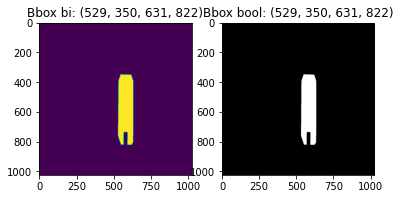

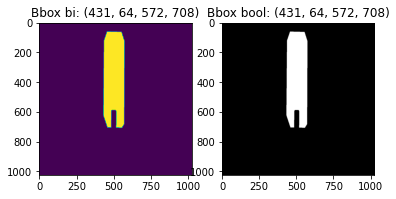

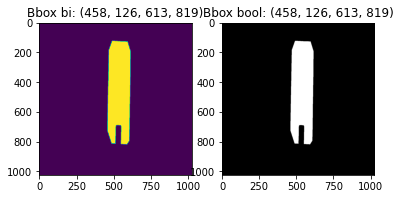

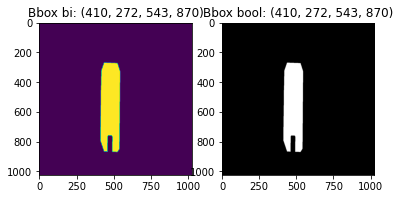

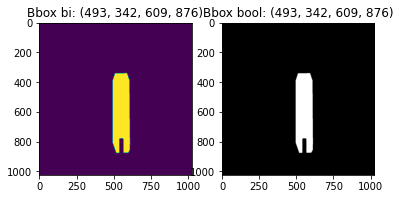

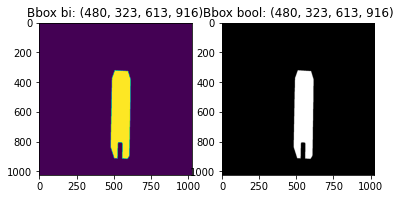

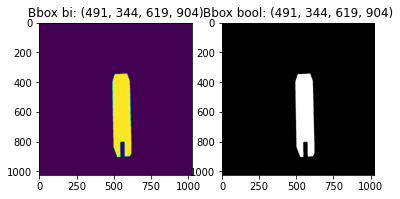

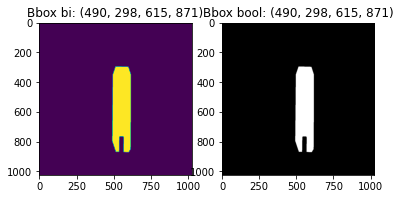

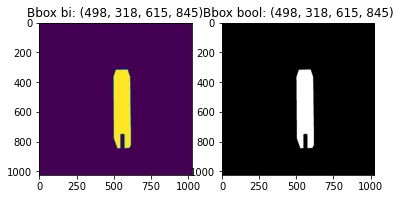

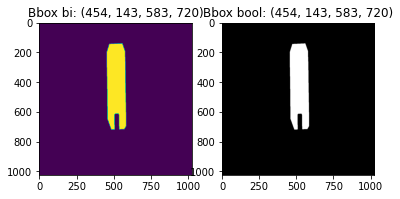

In [76]:
path = r'/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/SegmentationMasks'
size = 1024
data_syn = gan_op(path, size, True)
for i, img in enumerate(data_syn):
    data_syn[i] = binarize(img, True)

### GAN Image Data

AttributeError: 'numpy.ndarray' object has no attribute 'getbbox'

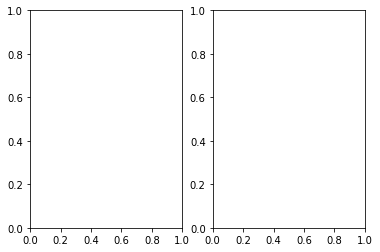

In [187]:
#test
GAN_mask_images = os.listdir(seg_dir)
bool_im = os.path.join(output_dir, 'bool')

if not os.path.exists(bool_im):
    try:
        os.mkdir(bool_im)
    except FileExistsError:
        print('Folder already exists')
        pass
    
for image in os.listdir(seg_dir):
    data = gan_op(seg_dir, 1024, True)
    
    for i, img in enumerate(data):
        data[i] = binarize(img, True)  #returns an image of binarized masks
        #cv2.imwrite(os.path.join(bool_im, image),data[i])
        f, ax = plt.subplots(1,2)
        for im in data:
            bbox = im[i].getbbox()
            ax[0].imshow(im[i])
            ax[0].set_title(f'Bbox bi: {bbox}')
    
        with data as im:
            bbox = im.getbbox()
            ax[1].imshow(im_save_bool)
            ax[1].set_title(f'Bbox bool: {bbox}')

### GAN versus synthetical Data compared

In [180]:
path = r'/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Blattfeder/SegmentationMasks'
size = 1024

#test read and resize for syn masks
data_syn = gan_op(path, size, True)
    
#test read and resize for gan masks
data_gan = gan_op(seg_dir, 1024, True)

data = np.concatenate((data_syn, data_gan), axis=0)

for i, img in enumerate(data):
    data[i] = binarize(img)
    

In [215]:
def loadpolygon():
    return

Since True is regarded as 1 and False is regarded as 0, when multiplied by 255 which is the Max value of uint8, True becomes 255 (white) and False becomes 0 (black)

In [179]:
def binarize(image, compare_flag=None):
    #print(type(image))
    #print(image[600,600])         # returns pixel value at 600*600
    
    thresh = 10
    im_bool = image > thresh
    #print(im_bool)                # prints for every image pixel true or false
    #print(im_bool.shape)          # returns np array size and therefore image height and lenght
    
    maxval = 255
    im_bin = (image > thresh) * maxval
    #print(im_bin)                 # prints for each image pixel 1 or 0
    
    im_save_bi = Image.fromarray(np.uint8(im_bin))
    im_save_bool = Image.fromarray((im_bool))
    
    f, ax = plt.subplots(1,2)
    with im_save_bi as im:
        bbox = im.getbbox()
        ax[0].imshow(im_save_bi)
        ax[0].set_title(f'Bbox bi: {bbox}')
    
    with im_save_bool as im:
        bbox = im.getbbox()
        ax[1].imshow(im_save_bool)
        ax[1].set_title(f'Bbox bool: {bbox}')    
   
    #im_syn = [file for file in os.listdir(path) if file.startswith("Instance")]
        
    return im_save_bi

In [135]:
def convexhull():
    return

In [85]:
def calculatescore(ground_truth, prediction_gan):
    """
    Compute feature consitency score of two segmentation masks.
    
    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)

    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot
          encoding y_pred.
          The 'naive' version return mean metrics where absent classes contribute
          to the class mean as 1.0 (instead of being dropped from the mean).
        drop_last = True: boolean flag to drop last class (usually reserved
          for background class in semantic segmentation)
        mean_per_class = False: return mean along batch axis for each class.
        verbose = False: print intermediate results such as intersection, union
          (as number of pixels).
    Returns:
        IoU of ground truth and GAN transformed syntetic Image, as a float.

    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """
    
    # check image shape to be the same
    assert ground_truth.shape == prediction_gan.shape, 'Input masks should be same shape, instead are {}, {}'.format(ground_truth.shape, prediction_gan.shape)
    print('Ground truth shape: '+str(ground_truth.shape))
    print('Predicted GAN image shape: '+str(prediction_gan.shape))
    
    intersection = np.logical_and(ground_truth, prediction_gan)
    union = np.logical_or(ground_truth, prediction_gan)
    mask_sum = np.sum(np.abs(union)) + np.sum(np.abs(intersection))
    iou_score = np.sum(intersection) / np.sum(union)
    dice_score = 2*np.sum(intersection) / np.sum(mask_sum) 
    print('IoU is: '+str(iou_score))
    print('Dice/F1 Score is: '+str(dice_score))
    return iou_score, dice_score

In [86]:
#test calculation 
calculatescore(data_syn, data_gan)

Ground truth shape: (20, 1024, 1024)
Predicted GAN image shape: (20, 1024, 1024)
IoU is: 0.38155377942604785
Dice/F1 Score is: 0.5523545809191162


(0.38155377942604785, 0.5523545809191162)

### Image mask transformation 
Translate image mask to white RGB(255,255,255), fill convex hull, and compare masks to calculate 'Feature Consistency Score' 

In [284]:
for file in glob.glob("*.png"):
    calculatescore()

## Print Confusion Matrix